In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

class Lorenz(object):
    
    def __init__(self, x, y, z, 
                 sigma=10.0, beta=8.0/3.0, rho=28.0, 
                 dt=0.001):
        self.x = x
        self.y = y
        self.z = z
        self.sigma = sigma
        self.beta = beta
        self.rho = rho
        self.dt = dt
        
    def step(self):
        x = self.x + self.dt*self.sigma*(self.y - self.x)
        y = self.y + self.dt*(self.x*(self.rho - self.z) - self.y)
        z = self.z + self.dt*(self.x*self.y - self.beta*self.z)
        self.x = x
        self.y = y
        self.z = z
    
    def stepn(self, N=100):
        for n in range(N):
            self.step()

In [5]:
lor = Lorenz(1., 2., 3.)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for n in range(1000):
    ax.plot((lor.x,), (lor.y,), (lor.z,))
    lor.stepn()

ValueError: Unknown projection '3d'

/Users/rdh/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


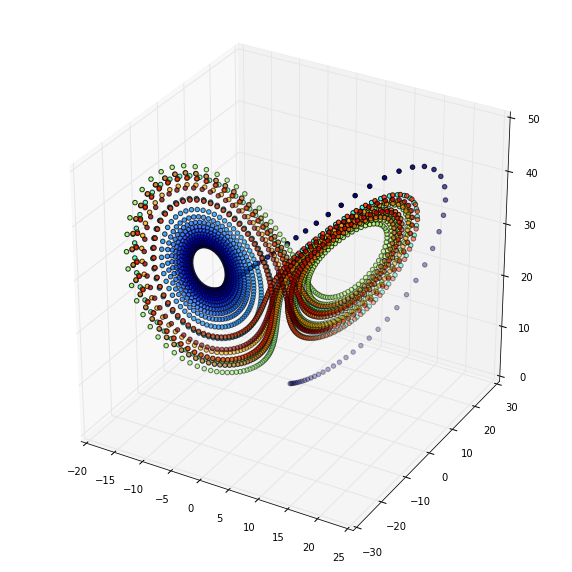

In [64]:
import scipy.integrate as integrate
import numpy as np

sigma=10.0
beta=8.0/3.0
rho=28.0

def lorenz(state, to):
    x, y, z = state
    xdot = sigma*(y-x)
    ydot = x*(rho-z)-y
    zdot = x*y - beta*z
    return (xdot, ydot, zdot)
    
t = np.linspace(0, 30, 3000)
sol = integrate.odeint(lorenz, (1., 2., 3.), t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

#ax.plot(sol[:, 0], sol[:, 1], sol[:, 2])
ax.scatter(sol[:, 0], sol[:, 1], sol[:, 2], c=t)
fig.show()